# Descargar y extraer datos

In [4]:
!pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.10-py3-none-any.whl size=73274 sha256=ad726ddb5212fd9ec573aa4517a026cb0a6cb870b1aa79b1c2021f690a975bd8
  Stored in directory: c:\users\usuario\appdata\local\pip\cache\wheels\a6\c1\5e\2b235e19b52c15ad35812881f8de4461399907e219c03bf7b5
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6774 sha256=464bf05b5f9296d7aba1743f8abfa3c54483b48eb0e284c32c6fda43581b6187
  Stored in directory: c:\users\usuario\appdata\local\pip\cache\wheels\91\4d\4f\e740a68c215791688c46c4d6251770a570e8dfea91af1acb5c
Successfully built kaggle python-slugify


In [ ]:
# Si es la primera vez hay que configurar el token

In [9]:
!kaggle competitions download -c dogs-vs-cats


  0%|          | 0.00/812M [00:00<?, ?B/s]
  0%|          | 1.00M/812M [00:00<05:03, 2.80MB/s]
  0%|          | 3.00M/812M [00:00<03:44, 3.79MB/s]
  1%|1         | 10.0M/812M [00:00<02:39, 5.28MB/s]
  2%|1         | 13.0M/812M [00:01<02:35, 5.40MB/s]
  2%|1         | 16.0M/812M [00:01<01:56, 7.15MB/s]
  2%|2         | 19.0M/812M [00:01<01:32, 8.98MB/s]
  3%|2         | 22.0M/812M [00:01<01:15, 10.9MB/s]
  3%|3         | 25.0M/812M [00:01<01:03, 13.0MB/s]
  3%|3         | 28.0M/812M [00:01<01:05, 12.5MB/s]
  4%|3         | 31.0M/812M [00:02<00:54, 15.1MB/s]
  5%|4         | 39.0M/812M [00:02<00:40, 20.0MB/s]
  5%|5         | 44.0M/812M [00:02<00:34, 23.2MB/s]
  6%|6         | 50.0M/812M [00:02<00:31, 25.1MB/s]
  7%|6         | 54.0M/812M [00:02<00:35, 22.6MB/s]
  8%|7         | 62.0M/812M [00:02<00:27, 28.8MB/s]
  8%|8         | 67.0M/812M [00:02<00:26, 29.7MB/s]
  9%|8         | 72.0M/812M [00:03<00:24, 31.5MB/s]
 10%|9         | 78.0M/812M [00:03<00:22, 34.6MB/s]
 10%|#         | 82.

In [28]:
import zipfile
import os
filename = "dogs-vs-cats.zip"
dir_ = "data"

In [13]:
filename = "dogs-vs-cats.zip"
dir_ = "data"

with zipfile.ZipFile(filename) as file:
    file.extractall(dir_)

os.remove(filename)

In [17]:
filename_train = os.path.join(dir_, "train.zip")
filename_test = os.path.join(dir_, "test1.zip")

with zipfile.ZipFile(filename_train) as file:
    file.extractall(dir_)
with zipfile.ZipFile(filename_test) as file:
    file.extractall(dir_)

os.remove(filename_train)
os.remove(filename_test)

# Preprocesamiento

In [33]:
import pandas as pd
import os
import random
from keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt

dir_ = "data"
train = "train"
test = "test1"

In [11]:
filenames = os.listdir("data/train")
print(len(filenames))

df = pd.DataFrame({'filename': filenames})

df['category'] = df.filename.apply(lambda name: 1 if name.split('.')[0]=="dog" else 0 )

display(df.head())
df.tail()

25000


,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


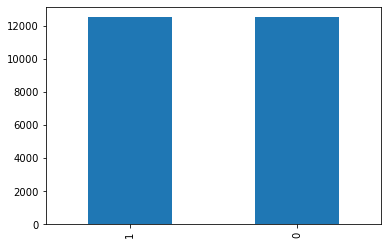

In [12]:
df['category'].value_counts().plot.bar()

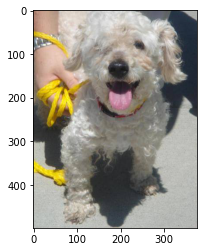

In [35]:
sample = random.choice(filenames)
image = load_img(os.path.join(dir_, train, sample))
plt.imshow(image)

In [38]:
df.to_csv('pics.csv',index=False)